# **Notebook 2a**: RF-DETR

<span style="font-size: 1.5rem;">By **Michael Farrugia**</span>

In [32]:
!pip install rfdetr==1.4.0
!pip install transformers==4.67.1
!pip install torch==2.8.0

ERROR: Ignored the following yanked versions: 4.14.0, 4.25.0, 4.46.0, 4.52.0, 4.57.0
ERROR: Could not find a version that satisfies the requirement transformers==4.67.1 (from versions: 0.1, 2.0.0, 2.1.0, 2.1.1, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.8.0, 2.9.0, 2.9.1, 2.10.0, 2.11.0, 3.0.0, 3.0.1, 3.0.2, 3.1.0, 3.2.0, 3.3.0, 3.3.1, 3.4.0, 3.5.0, 3.5.1, 4.0.0rc1, 4.0.0, 4.0.1, 4.1.0, 4.1.1, 4.2.0, 4.2.1, 4.2.2, 4.3.0rc1, 4.3.0, 4.3.1, 4.3.2, 4.3.3, 4.4.0, 4.4.1, 4.4.2, 4.5.0, 4.5.1, 4.6.0, 4.6.1, 4.7.0, 4.8.0, 4.8.1, 4.8.2, 4.9.0, 4.9.1, 4.9.2, 4.10.0, 4.10.1, 4.10.2, 4.10.3, 4.11.0, 4.11.1, 4.11.2, 4.11.3, 4.12.0, 4.12.1, 4.12.2, 4.12.3, 4.12.4, 4.12.5, 4.13.0, 4.14.1, 4.15.0, 4.16.0, 4.16.1, 4.16.2, 4.17.0, 4.18.0, 4.19.0, 4.19.1, 4.19.2, 4.19.3, 4.19.4, 4.20.0, 4.20.1, 4.21.0, 4.21.1, 4.21.2, 4.21.3, 4.22.0, 4.22.1, 4.22.2, 4.23.0, 4.23.1, 4.24.0, 4.25.1, 4.26.0, 4.26.1, 4.27.0, 4.27.1, 4.27.2, 4.27.3, 4.27.4, 4.28.0, 4.28.1, 4.29.0, 4.29.1, 4.29.2, 4

In [33]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [34]:
from rfdetr import RFDETRBase

In [35]:
rf_detr_model = RFDETRBase()

Loading pretrain weights


In [36]:
from PIL import Image

sample_img = Image.open("./MichaelFarrugia/images/MichaelFarrugia_1_Front.jpg")

In [ ]:
# perform inference on the sample image
rf_detr_model.optimize_for_inference()

detections = rf_detr_model.predict(sample_img)

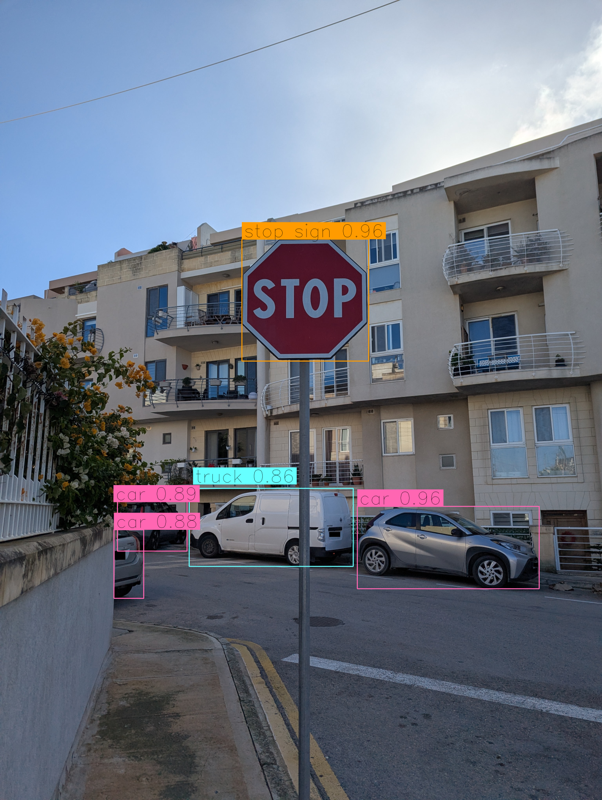

In [ ]:
import supervision as sv
from rfdetr.util.coco_classes import COCO_CLASSES

color = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff8080", "#ff66b2", "#ff66ff", "#b266ff",
    "#9999ff", "#3399ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])
text_scale = sv.calculate_optimal_text_scale(resolution_wh=sample_img.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=sample_img.size)

bbox_annotator = sv.BoxAnnotator(color=color, thickness=thickness)
label_annotator = sv.LabelAnnotator(
    color=color,
    text_color=sv.Color.BLACK,
    text_scale=text_scale,
    smart_position=True
)

labels = [
    f"{COCO_CLASSES[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = sample_img.copy()
annotated_image = bbox_annotator.annotate(annotated_image, detections)
annotated_image = label_annotator.annotate(annotated_image, detections, labels)
annotated_image.thumbnail((800, 800))
annotated_image